<a href="https://colab.research.google.com/github/yuji-sgs/media-optimization/blob/main/page_stay_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに
## 本ノートブックの目的
**メディアを改善した際のページ滞在時間を定量的に評価し、効果検証していく**

In [12]:
# 必要なモジュールの読み込み
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pymc as pm
import io
from google.colab import files
import urllib

In [7]:
plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

<ipython-input-7-45df2e9b0f84>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# 特定のページを分析

## **[SWELL コーポレートサイト]**
URL：https://sgs-prog.com/swell-cafe-homepage-develop1/

### 改善前の事後分布

In [2]:
# Google Colaboratoryでファイルをアップロード
uploaded = files.upload()

Saving swell_develop1_1101_1130.csv to swell_develop1_1101_1130.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['swell_develop1_1101_1130.csv']))
df

,user_pseudo_id,page_location,stay_duration
0,1.057529e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,59
1,1.057529e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,80
2,1.316323e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,21
3,1.443935e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,28
4,3.801589e+08,https://sgs-prog.com/swell-cafe-homepage-devel...,91
...,...,...,...
429,1.181966e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,331
430,7.685114e+08,https://sgs-prog.com/swell-cafe-homepage-devel...,29
431,9.664378e+08,https://sgs-prog.com/swell-cafe-homepage-devel...,82
432,1.809486e+09,https://sgs-prog.com/swell-cafe-homepage-devel...,132


In [4]:
df['stay_duration']

0       59
1       80
2       21
3       28
4       91
      ... 
429    331
430     29
431     82
432    132
433    224
Name: stay_duration, Length: 434, dtype: int64

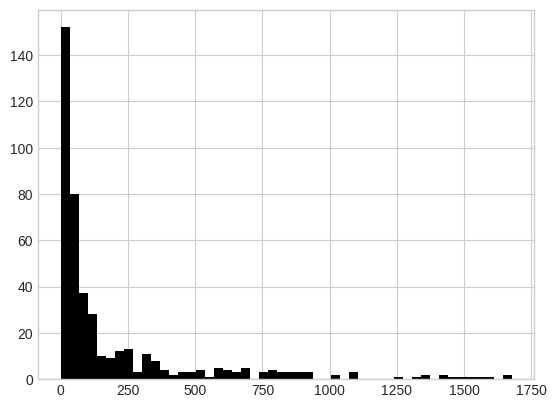

In [9]:
plt.hist(df['stay_duration'], bins=50)
plt.show()

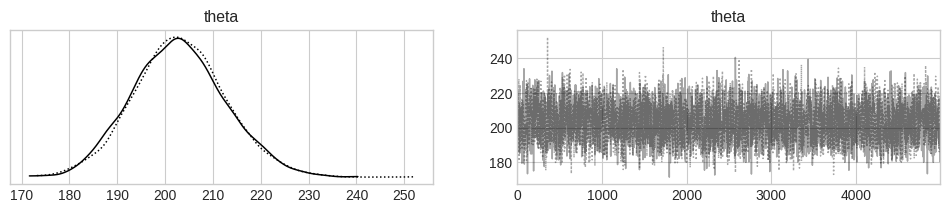

In [8]:
# 確率変数  𝜃  のサンプルの軌跡
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=3000)
  obs = pm.Exponential('obs', lam=1/theta, observed=df['stay_duration'])
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace)

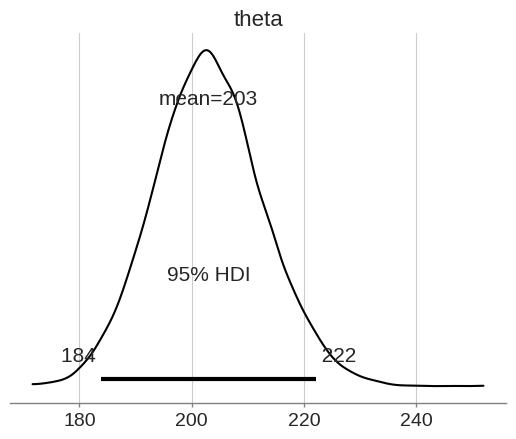

In [10]:
# 確率変数  𝜃  の事後分布
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

## **[SWELL 子テーマ]**
URL：https://sgs-prog.com/swell-child-theme/

### 改善前の事後分布（11/01〜11/30）

In [11]:
# Google Colaboratoryでファイルをアップロード
uploaded = files.upload()

Saving swell_childthema_1101_1130.csv to swell_childthema_1101_1130.csv


In [14]:
df = pd.read_csv(io.BytesIO(uploaded['swell_childthema_1101_1130.csv']))
df

,user_pseudo_id,page_location,stay_duration
0,2.019997e+09,https://sgs-prog.com/swell-child-theme/,108
1,1.061120e+09,https://sgs-prog.com/swell-child-theme/,194
2,6.840942e+06,https://sgs-prog.com/swell-child-theme/,88
3,6.400249e+08,https://sgs-prog.com/swell-child-theme/,547
4,6.400249e+08,https://sgs-prog.com/swell-child-theme/,5
...,...,...,...
69,1.078109e+09,https://sgs-prog.com/swell-child-theme/,81
70,1.892212e+09,https://sgs-prog.com/swell-child-theme/,123
71,8.605978e+08,https://sgs-prog.com/swell-child-theme/,164
72,1.979267e+09,https://sgs-prog.com/swell-child-theme/,86


In [15]:
df['stay_duration']

0     108
1     194
2      88
3     547
4       5
     ... 
69     81
70    123
71    164
72     86
73     88
Name: stay_duration, Length: 74, dtype: int64

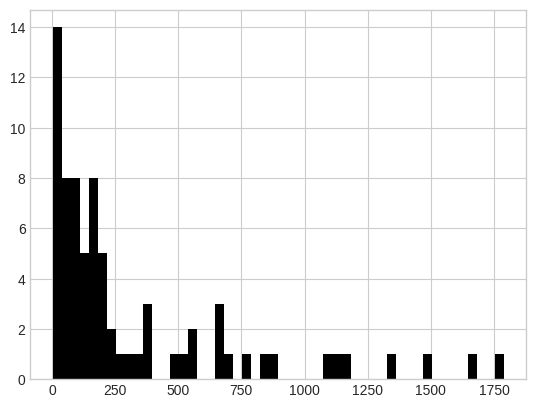

In [16]:
plt.hist(df['stay_duration'], bins=50)
plt.show()

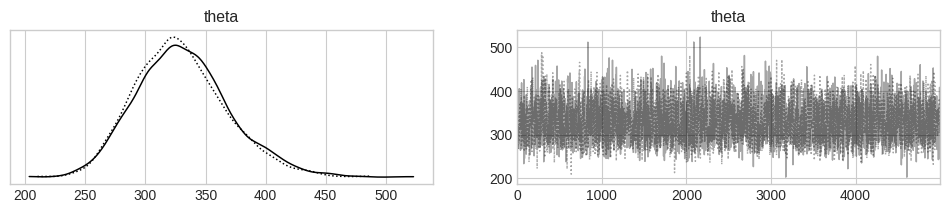

In [17]:
# 確率変数  𝜃  のサンプルの軌跡
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=3000)
  obs = pm.Exponential('obs', lam=1/theta, observed=df['stay_duration'])
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace)

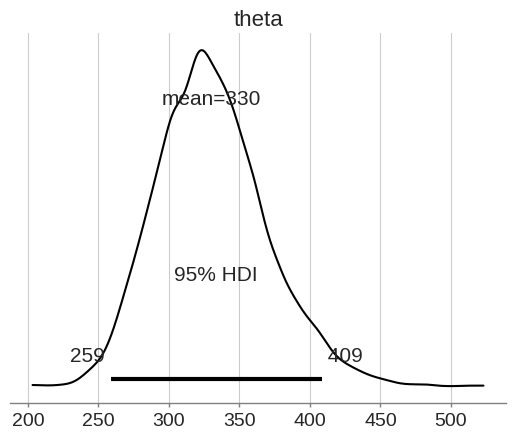

In [18]:
# 確率変数  𝜃  の事後分布
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

### 改善後（12/21〜）
- 改善内容
  - 記事に要約追加
  - コンテンツの質を改善
  - 導線をテキストに変更
